<a href="https://colab.research.google.com/github/SuwonJ/privateeducation_bigdata_analysis/blob/main/%EC%9E%A5%EC%88%98%EC%9B%90_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D(%EC%86%8C%EC%9D%B8%EC%88%98)%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,993 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and dire

# 파일 업로드

In [1]:
from google.colab import files
uploaded=files.upload()

Saving eduNscore.csv to eduNscore.csv
Saving genderNedu.csv to genderNedu.csv
Saving incomeNedu.csv to incomeNedu.csv
Saving regionNedu.csv to regionNedu.csv


In [37]:
import csv

f = open('eduNscore.csv', encoding='cp949')
eduNscore= csv.reader(f)
next(eduNscore)
next(eduNscore)
next(eduNscore)
eduNscore=list(eduNscore)
print(eduNscore)

f = open('genderNedu.csv', encoding='cp949')
genderNedu=   csv.reader(f)
next(genderNedu)
next(genderNedu)
next(genderNedu)
genderNedu=list(genderNedu)
print(genderNedu)

f = open('incomeNedu.csv', encoding='cp949')
incomeNedu= csv.reader(f)
next(incomeNedu)
incomeNedu=list(incomeNedu)
print(incomeNedu)

f = open('regionNedu.csv', encoding='cp949')
regionNedu= csv.reader(f)
next(regionNedu)
regionNedu=list(regionNedu)
print(regionNedu)

[['사교육 참여', '66.0', '77.5', '73.6', '67.5', '61.4', '54.0'], ['과목: 일반교과 사교육', '55.4', '72.6', '67.9', '59.2', '48.3', '34.3'], ['국  어', '25.8', '38.0', '34.7', '26.6', '20.6', '13.9'], ['영  어', '42.1', '55.9', '52.9', '46.2', '35.3', '23.8'], ['수  학', '46.7', '65.7', '59.1', '50.1', '38.7', '26.3'], ['사회, 과학', '14.3', '21.4', '18.4', '15.2', '11.6', '7.3'], ['논  술', '1.9', '1.5', '2.4', '2.1', '2.1', '1.2'], ['제2외국어, 한문, 컴퓨터 등', '1.7', '1.3', '1.6', '1.8', '1.5', '2.2'], ['컴퓨터', '0.8', '0.7', '0.6', '0.8', '0.6', '1.1'], ['제2외국어, 한문', '1.0', '0.6', '1.0', '1.1', '0.8', '1.1'], ['과목: 예체능,취미,교양 사교육', '16.0', '8.5', '10.8', '13.9', '19.9', '24.8'], ['음  악', '3.9', '2.4', '3.1', '3.2', '4.6', '6.1'], ['미  술', '4.1', '1.8', '2.9', '3.8', '5.8', '5.3'], ['체  육', '5.8', '3.3', '3.5', '5.0', '6.7', '9.8'], ['취미·교양', '3.0', '1.4', '1.7', '2.5', '3.7', '5.3'], ['과목: 취업관련 사교육', '1.9', '1.5', '1.4', '1.7', '1.9', '3.2'], ['과목: 진로·진학 학습상담', '4.0', '7.5', '5.7', '3.2', '2.9', '2.5'], ['유형: 일반교과 사교육'

# 1. 학생 성별&사교육비

In [67]:
subject=[0]*28
subject = [str(i) for i in subject]
male=[0]*28
female=[0]*28
i=0
for row in genderNedu:
  subject[i]=row[0]
  male[i]=row[1]
  female[i]=row[2]
  i+=1

28 ['사교육 참여', '과목: 일반교과 사교육', '국  어', '영  어', '수  학', '사회, 과학', '논  술', '제2외국어, 한문, 컴퓨터 등', '컴퓨터', '제2외국어, 한문 등', '과목: 예체능,취미,교양 사교육', '음  악', '미  술', '체  육', '취미·교양', '과목: 취업관련 사교육', '과목: 진로·진학 학습상담', '유형: 일반교과 사교육', '개인과외', '그룹과외', '학원수강', '방문학습지', '유료인터넷 및 통신강좌 등', '유형: 예체능,취미,교양 사교육', '개인과외', '그룹과외', '학원수강', '방문수업 및 기타']
28 ['78.3', '63.2', '24.9', '52.1', '52.7', '14.0', '10.6', '6.2', '2.4', '4.3', '45.3', '18.8', '10.8', '28.3', '4.6', '0.5', '2.3', '63.2', '9.9', '8.4', '47.8', '10.8', '11.3', '45.3', '5.0', '3.5', '37.8', '4.1']


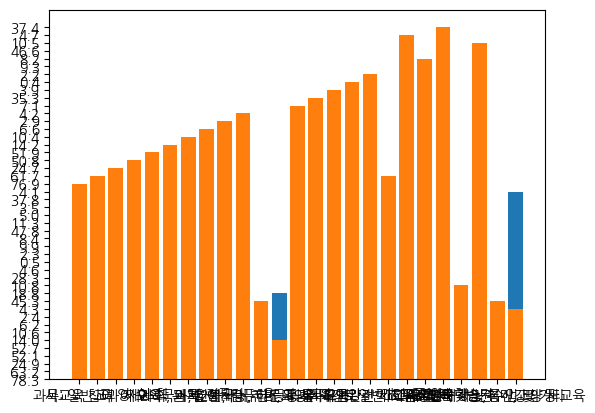

In [74]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.bar(subject,male)
plt.bar(subject,female)
plt.show()


# 지역 & 사교육비